# NLP

- как предобработать данные
- как векторизовать текст
- как решать задачу классификации

In [1]:
import numpy as np
import pandas as pd

## Регулярные выражения

При помощи регулярок можно находить сложные паттерны в строках.

Ниже пример проверки на валидность адреса электронной почты. 

В реальном приложении лучше не использовать такую проверку.

In [ ]:
import re
regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

# Don't use it in prod
def check(email):
    if(re.fullmatch(regex, email)):
        print("Valid Email") 
    else:
        print("Invalid Email")
        
check('valid_email@mail.ru')
check('invalid email')
check('invalid_email@mail.21')
check('valid_email@mail.c')

Valid Email
Invalid Email
Invalid Email
Invalid Email


## Задача

Предобработать текст следующим способом:

- разбить текст на слова
- привести все к нижнему регистру
- убрать из текста все точки, запятые и скобки

Найти в тексте самое частовстречаемое слово.

In [6]:
def preprocess_text(text):
    # Ваш код здесь
    pass

In [ ]:
text = "Разобьем этот текст на слова, приведем к нижнему регистру. Затем уберем пунктуацию (точки, запятые и скобки). А потом найдем слово, которое встречается чаще всего. текст текст текст."
preprocess_text(text)

## Bag of word

Чтобы применять к тексту методы машинного обучения, его необходимо векторизовать (превратить в массив чисел). Это можно сделать разными способами. Самый простой способ - bag of word.

Разбиваем весь текст на токены (слова). Затем формируем матрицу, в которой в строках храним предложения, а в колонках слова. За каждое вхождение слова в предложение добавляем 1 в соответствующую ячейку. Не забываем убрать знаки препинания, табуляцию, пробелы и знаки переноса строки.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]

bow = CountVectorizer()
bow_result = bow.fit_transform(corpus).toarray()
pd.DataFrame(bow_result, columns=bow.get_feature_names(), index=corpus)

/Users/svkov42/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,document,first,is,one,second,the,third,this
This is the first document.,0,1,1,1,0,0,1,0,1
This is the second second document.,0,1,0,1,0,2,1,0,1
And the third one.,1,0,0,0,1,0,1,1,0
Is this the first document?,0,1,1,1,0,0,1,0,1


С русским текстом это будет работать не очень хорошо

In [11]:
corpus = [
    'Это первый документ.',
    'Это второй документ среди всех документов.',
    'А вот и третий.',
    'Вот и кончились документы.',
]

bow = CountVectorizer()
bow_result = bow.fit_transform(corpus).toarray()
pd.DataFrame(bow_result, columns=bow.get_feature_names(), index=corpus)

/Users/svkov42/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,вот,всех,второй,документ,документов,документы,кончились,первый,среди,третий,это
Это первый документ.,0,0,0,1,0,0,0,1,0,0,1
Это второй документ среди всех документов.,0,1,1,1,1,0,0,0,1,0,1
А вот и третий.,1,0,0,0,0,0,0,0,0,1,0
Вот и кончились документы.,1,0,0,0,0,1,1,0,0,0,0


"документ", "документов", "документы" - это все об одном, но колонки получились разные. Что делать с этим?

Применить стемминг!

## Стемминг

Стемминг - процесс извлечения основы слова, потому что зачастую форма слова не влияет на смысл.

В классе будем использовать довольно простой стеммер Портера. На практике лучше использовать библиотеку `nltk` для русского текста.

In [3]:
# Взято отсюда: https://gist.github.com/Kein1945/9111512
import re

class Porter:
	PERFECTIVEGROUND =  re.compile(u"((ив|ивши|ившись|ыв|ывши|ывшись)|((?<=[ая])(в|вши|вшись)))$")
	REFLEXIVE = re.compile(u"(с[яь])$")
	ADJECTIVE = re.compile(u"(ее|ие|ые|ое|ими|ыми|ей|ий|ый|ой|ем|им|ым|ом|его|ого|ему|ому|их|ых|ую|юю|ая|яя|ою|ею)$")
	PARTICIPLE = re.compile(u"((ивш|ывш|ующ)|((?<=[ая])(ем|нн|вш|ющ|щ)))$")
	VERB = re.compile(u"((ила|ыла|ена|ейте|уйте|ите|или|ыли|ей|уй|ил|ыл|им|ым|ен|ило|ыло|ено|ят|ует|уют|ит|ыт|ены|ить|ыть|ишь|ую|ю)|((?<=[ая])(ла|на|ете|йте|ли|й|л|ем|н|ло|но|ет|ют|ны|ть|ешь|нно)))$")
	NOUN = re.compile(u"(а|ев|ов|ие|ье|е|иями|ями|ами|еи|ии|и|ией|ей|ой|ий|й|иям|ям|ием|ем|ам|ом|о|у|ах|иях|ях|ы|ь|ию|ью|ю|ия|ья|я)$")
	RVRE = re.compile(u"^(.*?[аеиоуыэюя])(.*)$")
	DERIVATIONAL = re.compile(u".*[^аеиоуыэюя]+[аеиоуыэюя].*ость?$")
	DER = re.compile(u"ость?$")
	SUPERLATIVE = re.compile(u"(ейше|ейш)$")
	I = re.compile(u"и$")
	P = re.compile(u"ь$")
	NN = re.compile(u"нн$")

	def stem(word):
		word = word.lower()
		word = word.replace(u'ё', u'е')
		m = re.match(Porter.RVRE, word)
		if m and m.groups():
			pre = m.group(1)
			rv = m.group(2)
			temp = Porter.PERFECTIVEGROUND.sub('', rv, 1)
			if temp == rv:
				rv = Porter.REFLEXIVE.sub('', rv, 1)
				temp = Porter.ADJECTIVE.sub('', rv, 1)
				if temp != rv:
					rv = temp
					rv = Porter.PARTICIPLE.sub('', rv, 1)
				else:
					temp = Porter.VERB.sub('', rv, 1)
					if temp == rv:
						rv = Porter.NOUN.sub('', rv, 1)
					else:
						rv = temp
			else:
				rv = temp
			
			rv = Porter.I.sub('', rv, 1)

			if re.match(Porter.DERIVATIONAL, rv):
				rv = Porter.DER.sub('', rv, 1)

			temp = Porter.P.sub('', rv, 1)
			if temp == rv:
				rv = Porter.SUPERLATIVE.sub('', rv, 1)
				rv = Porter.NN.sub(u'н', rv, 1)
			else:
				rv = temp
			word = pre+rv
		return word
	stem=staticmethod(stem)


In [4]:
Porter.stem('документа'), Porter.stem('документы'), Porter.stem('документов')

('документ', 'документ', 'документ')

In [ ]:
def preprocess_word(word):
    return Porter.stem(word.replace('.', ''))

In [29]:
! pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 667.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.0 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.0/291.0 kB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 1.9 MB/s eta 0:00:00a 0:00:01


# Пример с nltk

https://www.nltk.org/howto/stem.html

In [30]:
from nltk.stem.porter import *

In [31]:
stemmer = PorterStemmer()

In [32]:
plurals = ['caresses', 'flies', 'dies', 'mules', 'denied', 
           'died', 'agreed', 'owned', 'humbled', 'sized',
           'meeting', 'stating', 'siezing', 'itemization',
           'sensational', 'traditional', 'reference', 'colonizer',
           'plotted']

In [33]:
singles = [stemmer.stem(plural) for plural in plurals]

# Задача

Написать функцию для обработки предложения при помощи стемминга для английского языка

In [7]:
def preprocess_sentence(text):
    # Ваш код здесь
    pass

## Попробуем взять документ побольше

In [26]:
df = pd.read_csv('../data/spam.csv')
df

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will ? b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


Посмотрим на сбалансированность классов

<AxesSubplot:>

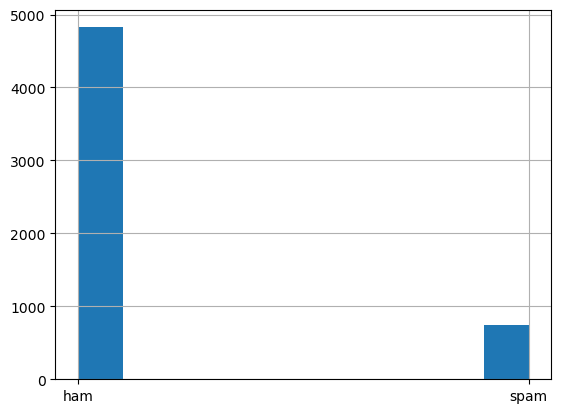

In [28]:
df['target'].hist()

## Задача

Применить стемминг к тексту и добавить колонку `text_stemmed`

## Задача

Выбрать метрику и модель, векторизовать текст и научиться искать спам

## TF-IDF

BOW - очень простой алгоритм, но даже он дает неплохой результат. Попробуем его улучшить. 

`TF-IDF` - формула, состоящая из двух частей **Term frequency - Inverse Document Frequency**

`TF` - какой процент указанного слова по отношению ко всем словам в документе

`IDF` - количество документов делим на количество документов, в которые входит данное слово

`TF-IDF` = `TF` * `IDF`

Класс `TfidfVectorizer` имеет такие же методы, как и `CountVectorizer`.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Задача 

Применить TF-IDF к тому же датасету, сравнить качество с BOW

In [ ]:
# Ваш код здесь


## Пайплайны

Можно использовать сложные преобразования и легко сравнивать качество моделей, а также подбирать гиперпараметры, используя пайплайны

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf", LogisticRegression()),
    ]
)

Подробнее можно посмотреть [тут](https://www.kaggle.com/sermakarevich/sklearn-pipelines-tutorial)

Мы вернемся к пайплайнам через несколько занятий и рассмотрим инструменты, которые дают большую гибкость, чем sklearn

## Задача

Попробовать случайный лес для классификации документов. Использовать пайплайны для решения.

Выборку необходимо как и раньше делить на треин и тест.

In [ ]:
# Ваш код здесь


## Лемматизаторы

Лемматизация - поиск начальной формы слова.

Используя лемматизаторы можно более точно различать слова, но работают они медленнее, чем стемммеры

In [ ]:
! pip install pymorphy2

     |████████████████████████████████| 55 kB 2.4 MB/s eta 0:00:011
     |████████████████████████████████| 8.2 MB 27.3 MB/s 


In [47]:
df = pd.read_csv('../data/rus_doc_sentiment.csv')
df.head()

,original data,score
0,"Не рациональная системность, а интуитивный поз...",0
1,"Когда возникнут трудности, они тебе не помогут...",0
2,Кривая национализация это политический компром...,-1
3,Такой вид биологического оружия не действует н...,-2
4,В Эль-Кусейре /к западу от Хомса/ сирийские по...,0


In [ ]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

morph_res = morph.parse('дети')
morph_res[0].normal_form


'ребёнок'

In [ ]:
morph.parse('дети')[0].normal_form

'ребёнок'

## Задача

Применить лемматизацию перед TF-IDF. Решить задачу классификации. Сравнить результат со стеммингом.

In [35]:
# Ваш код здесь

## Word2Vec

Все предыдущие методы позволяли посмотреть частоту вхождения слова, но при этом не учитывали смысл слова и похожесть слов.

Метод word2vec пытается понять смысл слов.

![](../images/word2vec.png)

In [ ]:
def process_sentences(df):
    """
    Разбиваем на слова, убираем пунктуацию и применяем стемминг
    """
    processed_texts = []
    for i, text in enumerate(df['text']):
        if i % 500 == 0:
            print(i) # Отмечаем прогресс
        text = text.lower()
        words = re.findall(r'\b\w+\b', text) # Убираем пунктуацию, разбиваем на слова
        tokens = [Porter.stem(word) for word in words] # Применяем стемминг
        processed_texts.append(tokens)
    return processed_texts

In [ ]:
processed_texts = process_sentences(df)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=processed_texts)

In [ ]:
model.train(processed_texts, total_examples=len(processed_texts), epochs=30)

(49300205, 58933440)

In [ ]:
def get_v(word):
    return model.wv[Porter.stem(word)]

model.wv.similar_by_vector(get_v('полиция') + get_v('мужчина'))

[('полиц', 0.8942763209342957),
 ('полицейск', 0.8309827446937561),
 ('мужчин', 0.8248519897460938),
 ('милиц', 0.7188462018966675),
 ('пенсионерк', 0.699247419834137),
 ('преступник', 0.691802442073822),
 ('охранник', 0.6899130344390869),
 ('спасател', 0.6889834403991699),
 ('грабител', 0.6472103595733643),
 ('злоумышленник', 0.631364107131958)]

## Задача

Используя word2vec классифицировать тексты

Алгоритм:

- разделить на треин и тест выборки
- обучить word2vec на треин выборке
- написать функцию для составления вектора по документу (для этого нужно посчитать среднее векторов всех слов)
- обучить модель, оценить результаты

Для начала лучше взять небольшую выборку, чтобы проще было писать код (например, 2000 в треин и 5 примеров в тест). 

Когда убедились, что все работает, брать весь датасет.

Функции, которые могут помочь и подсказки:

- `model.wv.key_to_index` - словарь токен->номер токена. Можно взять список всех слов отсюда.
- `model.wv[word]` - получаем вектор по слову. Не забываем применить предобработку!
- может случиться так, что word2vec не будет знать какого-то слова из обучающей выборки. Тогда этому слову присваиваем нулевой вектор.

# Домашняя работа

Работаем с отзывами на авиа-компанию:

https://www.kaggle.com/datasets/kanchana1990/singapore-airlines-reviews/data


## Easy

Выбрать метрику.

Удалить пунктуацию из датасета.

Преобразовать датасет в BOW или TF-IDF, поделить на треин-тест и спрогнозировать вашей любимой моделью

## Normal

Удалить стоп-слова, применить стемминг/лемматизацию. Обучить несколько моделей, подобрать параметры, сделать выводы.

Написать самостоятельно два отзыва - один положительный, один негативный, посмотреть, угадает ли модель.

## Hard

Исследовать какие слова полученный алгоритм воспринимает как резко-негативные и резко-позитивные. Научиться систематически обманывать классификатор. Написать 5 положительных и 5 негативных отзывов, где модель будет ошибаться. Важен алгоритм по которому вы составляете эти отзывы, а не сами отзывы.